In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Importing dataset
from sklearn.datasets import fetch_california_housing

# Fetch the California housing dataset
california_housing = fetch_california_housing()

# Convert the data and target to a DataFrame
X_california = pd.DataFrame(california_housing.data, columns=california_housing.feature_names)
y_california = pd.Series(california_housing.target)

# Now, you can use the .head() method to view the first few rows of the dataset
print(X_california.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  


#### Linear Regression Code

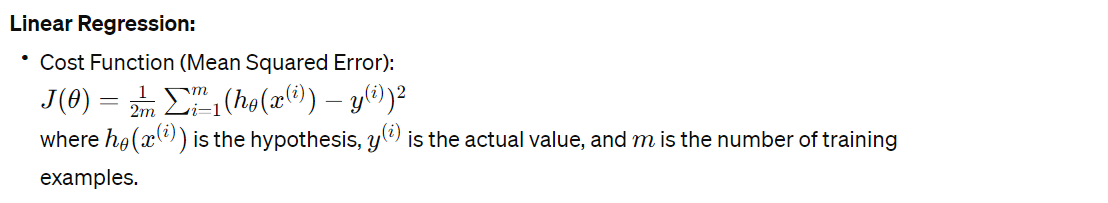

In [4]:
# Import Necessary Libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Instead of using a single feature, let's use all the features available

# Data splitting
X_train_california, X_test_california, y_train_california, y_test_california = train_test_split(X_california, y_california, test_size=0.2, random_state=42)

# Data transformation
scaler = StandardScaler()
X_train_scaled_california = scaler.fit_transform(X_train_california)
X_test_scaled_california = scaler.transform(X_test_california)

# Model training
model_california = LinearRegression()
model_california.fit(X_train_scaled_california, y_train_california)

# Predictions
predictions_california = model_california.predict(X_test_scaled_california)

# Evaluation
mse_california = mean_squared_error(y_test_california, predictions_california)
r2_california = r2_score(y_test_california, predictions_california)

print(f"MSE (Linear Regression with California dataset using multiple features): {mse_california}")
print(f"R² (Linear Regression with California dataset using multiple features): {r2_california}")

MSE (Linear Regression with California dataset using multiple features): 0.5558915986952442
R² (Linear Regression with California dataset using multiple features): 0.575787706032451


#### Ridge Regression Code

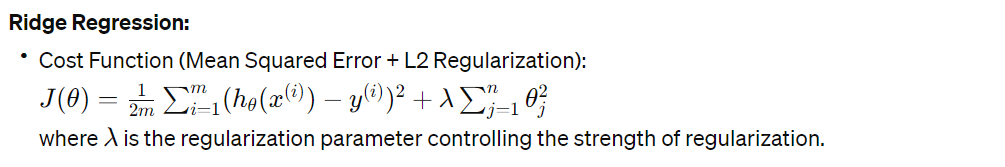

In [5]:
# Import necessary libraries
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Data splitting
X_train_california, X_test_california, y_train_california, y_test_california = train_test_split(X_california, y_california, test_size=0.2, random_state=42)

# Data transformation
scaler = StandardScaler()
X_train_scaled_california = scaler.fit_transform(X_train_california)
X_test_scaled_california = scaler.transform(X_test_california)

# Model training with Ridge Regression
ridge = Ridge()

# Define a range of hyperparameters for tuning
parameters = {'alpha': np.logspace(-4, 4, 20)} # np.logspace(-4, 4, 20), generates 20 values for alpha logarithmically spaced between 10^−4 and 10^4
 
# Use GridSearchCV for hyperparameter tuning and cross-validation
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5)
ridge_regressor.fit(X_train_scaled_california, y_train_california)

# Best model after hyperparameter tuning
print(f"Best parameters: {ridge_regressor.best_params_}")
best_ridge_model = ridge_regressor.best_estimator_

# Predictions
predictions_california = best_ridge_model.predict(X_test_scaled_california)

# Evaluation
mse_california = mean_squared_error(y_test_california, predictions_california)
r2_california = r2_score(y_test_california, predictions_california)

# Cross-validation scores
cross_val_scores = cross_val_score(best_ridge_model, X_train_scaled_california, y_train_california, cv=5, scoring='r2')
print(f"MSE (Ridge Regression with California dataset using multiple features): {mse_california}")
print(f"R² (Ridge Regression with California dataset using multiple features): {r2_california}")
print(f"Cross-validation R² scores: {cross_val_scores}")
print(f"Mean cross-validation R²: {np.mean(cross_val_scores)}")

Best parameters: {'alpha': 0.08858667904100823}
MSE (Ridge Regression with California dataset using multiple features): 0.5558883343065736
R² (Ridge Regression with California dataset using multiple features): 0.5757901971544783
Cross-validation R² scores: [0.62011468 0.61298862 0.61344084 0.61069981 0.60017603]
Mean cross-validation R²: 0.6114839941232662


#### Lasso Regression Code

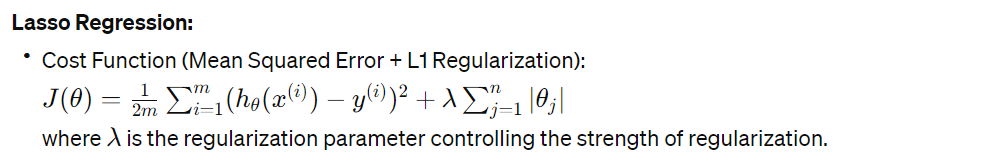

In [6]:
# Import Libraries
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Data splitting
X_train_california, X_test_california, y_train_california, y_test_california = train_test_split(X_california, y_california, test_size=0.2, random_state=42)

# Data transformation
scaler = StandardScaler()
X_train_scaled_california = scaler.fit_transform(X_train_california)
X_test_scaled_california = scaler.transform(X_test_california)

# Model training with Lasso Regression
lasso = Lasso()

# Define a range of hyperparameters for tuning
parameters = {'alpha': np.logspace(-4, 4, 20)}

# Use GridSearchCV for hyperparameter tuning and cross-validation
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(X_train_scaled_california, y_train_california)

# Best model after hyperparameter tuning
print(f"Best parameters: {lasso_regressor.best_params_}")
best_lasso_model = lasso_regressor.best_estimator_

# Predictions
predictions_california = best_lasso_model.predict(X_test_scaled_california)

# Evaluation
mse_california = mean_squared_error(y_test_california, predictions_california)
r2_california = r2_score(y_test_california, predictions_california)

# Calculate Adjusted R²
n = X_test_california.shape[0]  # number of observations
p = X_test_california.shape[1]  # number of predictors
adjusted_r2_california = 1 - (1 - r2_california) * (n - 1) / (n - p - 1)

# Cross-validation scores
cross_val_scores = cross_val_score(best_lasso_model, X_train_scaled_california, y_train_california, cv=5, scoring='r2')
print(f"MSE (Lasso Regression with California dataset using multiple features): {mse_california}")
print(f"R² (Lasso Regression with California dataset using multiple features): {r2_california}")
print(f"Adjusted R² (Lasso Regression with California dataset using multiple features): {adjusted_r2_california}")
print(f"Cross-validation R² scores: {cross_val_scores}")
print(f"Mean cross-validation R²: {np.mean(cross_val_scores)}")

Best parameters: {'alpha': 0.0006951927961775605}
MSE (Lasso Regression with California dataset using multiple features): 0.5549027801255276
R² (Lasso Regression with California dataset using multiple features): 0.5765422937879804
Adjusted R² (Lasso Regression with California dataset using multiple features): 0.5757198461915501
Cross-validation R² scores: [0.61997027 0.61295365 0.61336948 0.61077418 0.60044958]
Mean cross-validation R²: 0.6115034304875836


#### Elastic Net Code

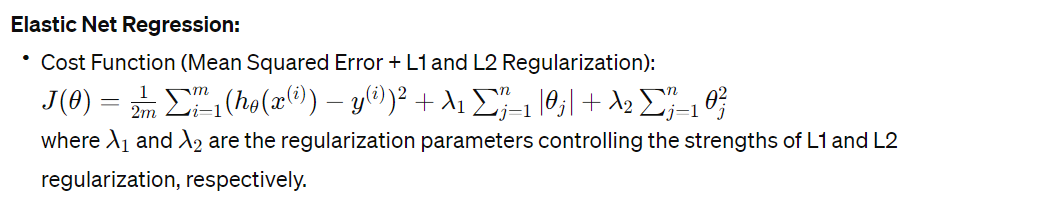

In [7]:
# Import Libraries
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Data splitting
X_train_california, X_test_california, y_train_california, y_test_california = train_test_split(X_california, y_california, test_size=0.2, random_state=42)

# Data transformation
scaler = StandardScaler()
X_train_scaled_california = scaler.fit_transform(X_train_california)
X_test_scaled_california = scaler.transform(X_test_california)

# Elastic Net model training
elastic_net = ElasticNet()

# Define a range of hyperparameters for tuning
parameters = {
    'alpha': np.logspace(-4, 4, 10),
    'l1_ratio': np.linspace(0, 1, 10)
}
# In Elastic Net regularization, l1_ratio is a parameter that determines the mixing ratio between Lasso (L1) and Ridge (L2) penalties. 
# It takes values between 0 and 1, inclusive, where:

    # l1_ratio = 0 corresponds to Ridge regression, where only the L2 penalty is used.
    # l1_ratio = 1 corresponds to Lasso regression, where only the L1 penalty is used.
    # 0 < l1_ratio < 1 corresponds to a combination of L1 and L2 penalties, where both penalties are used simultaneously.

# Use GridSearchCV for hyperparameter tuning and cross-validation
elastic_net_regressor = GridSearchCV(elastic_net, parameters, scoring='neg_mean_squared_error', cv=5)
elastic_net_regressor.fit(X_train_scaled_california, y_train_california)

# Best model after hyperparameter tuning
print(f"Best parameters: {elastic_net_regressor.best_params_}")
best_elastic_net_model = elastic_net_regressor.best_estimator_

# Predictions
predictions_california = best_elastic_net_model.predict(X_test_scaled_california)

# Evaluation
mse_california = mean_squared_error(y_test_california, predictions_california)
r2_california = r2_score(y_test_california, predictions_california)

# Calculate Adjusted R²
n = X_test_california.shape[0]  # number of observations
p = X_test_california.shape[1]  # number of predictors
adjusted_r2_california = 1 - (1 - r2_california) * (n - 1) / (n - p - 1)

print(f"MSE (Elastic Net Regression with California dataset using multiple features): {mse_california}")
print(f"R² (Elastic Net Regression with California dataset using multiple features): {r2_california}")
print(f"Adjusted R² (Elastic Net Regression with California dataset using multiple features): {adjusted_r2_california}")

Best parameters: {'alpha': 0.000774263682681127, 'l1_ratio': 1.0}
MSE (Elastic Net Regression with California dataset using multiple features): 0.554794797137525
R² (Elastic Net Regression with California dataset using multiple features): 0.5766246978235111
Adjusted R² (Elastic Net Regression with California dataset using multiple features): 0.5758024102737631


#### Polynomial Regression

In [8]:
# Import necessary libraries
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import Ridge  # Using Ridge regression to include regularization
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

# Data splitting
X_train, X_test, y_train, y_test = train_test_split(X_california, y_california, test_size=0.2, random_state=42)

# Data transformation with Polynomial Features
poly_degree = 2  # Degree of the polynomial features, polynomial of degree n can model up to n-1 turning points
poly_features = PolynomialFeatures(degree=poly_degree, include_bias=False)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Data scaling
scaler = StandardScaler()
X_train_poly_scaled = scaler.fit_transform(X_train_poly)
X_test_poly_scaled = scaler.transform(X_test_poly)

# Model training with Ridge Regression (to include regularization)
ridge = Ridge()

# Hyperparameter tuning with GridSearchCV
parameters = {'alpha': np.logspace(-4, 4, 10)}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5)
ridge_regressor.fit(X_train_poly_scaled, y_train)

# Best model after hyperparameter tuning
print(f"Best parameters: {ridge_regressor.best_params_}")
best_model = ridge_regressor.best_estimator_

# Predictions
predictions = best_model.predict(X_test_poly_scaled)

# Evaluation
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

# Calculate Adjusted R²
n = X_test_poly_scaled.shape[0]  # Number of observations
p = X_test_poly_scaled.shape[1]  # Number of predictors
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

# Cross-validation scores
cross_val_scores = cross_val_score(best_model, X_train_poly_scaled, y_train, cv=5, scoring='r2')
print(f"MSE (Polynomial Regression): {mse}")
print(f"R² (Polynomial Regression): {r2}")
print(f"Adjusted R² (Polynomial Regression): {adjusted_r2}")
print(f"Cross-validation R² scores: {cross_val_scores}")
print(f"Mean cross-validation R²: {np.mean(cross_val_scores)}")

Best parameters: {'alpha': 1291.5496650148827}
MSE (Polynomial Regression): 0.571849761678651
R² (Polynomial Regression): 0.5636097041655611
Adjusted R² (Polynomial Regression): 0.5589069921849794
Cross-validation R² scores: [0.61307285 0.60837093 0.59925749 0.58749147 0.59671198]
Mean cross-validation R²: 0.6009809470312093
